In [1]:
import pandas as pd                       # import libraries  required
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data =pd.read_csv(r"D:\Project dataset\train_Loan_pred.csv")

In [3]:
test_data =pd.read_csv(r"D:\Project dataset\test_Loan_pred.csv")

In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_data.shape

(614, 13)

In [6]:
test_data.shape

(367, 12)

In [7]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [8]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train_data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

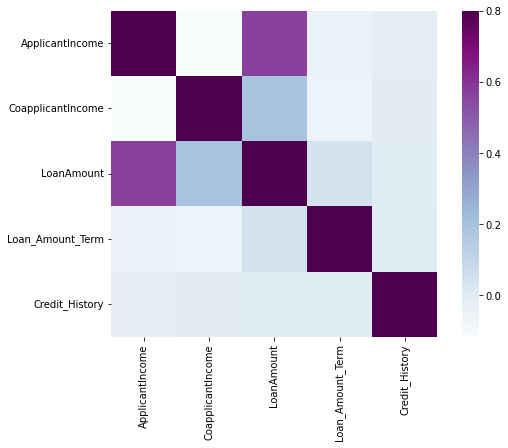

In [12]:
matrix = train_data.corr()
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [13]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Univariate Analysis

In [14]:
status=["Yes","No"]

In [15]:
count=train_data["Loan_Status"].value_counts().values
count

array([422, 192], dtype=int64)

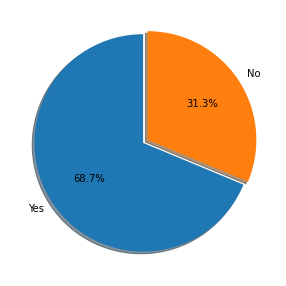

In [16]:
plt.figure(figsize=(10,5))
plt.pie(count,labels=status,autopct="%1.1f%%",shadow=True,startangle=90,explode=(0,0.05))
plt.show()

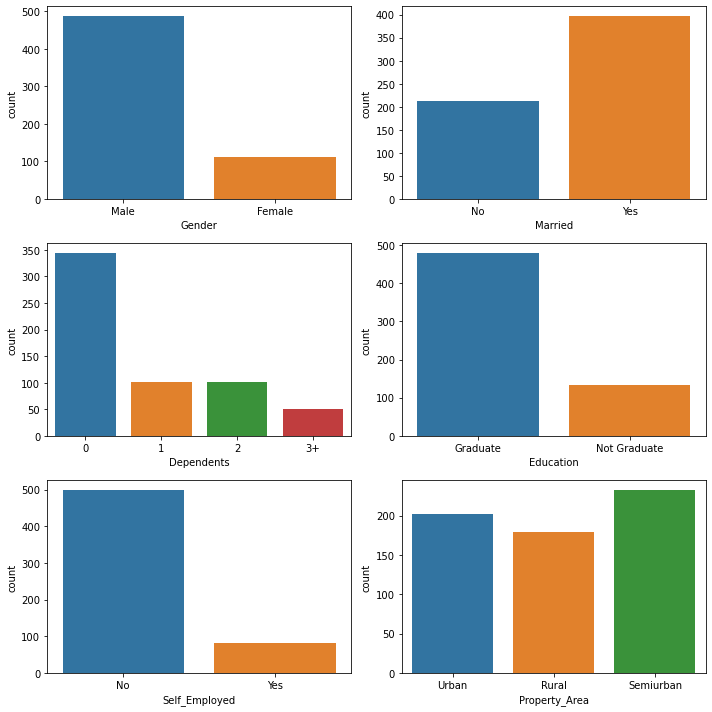

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

groups = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.ravel()

for i, group in enumerate(groups):
    sns.countplot(x=group, data=train_data, ax=axs[i], fill=True)
plt.tight_layout()
plt.show()


<AxesSubplot:>

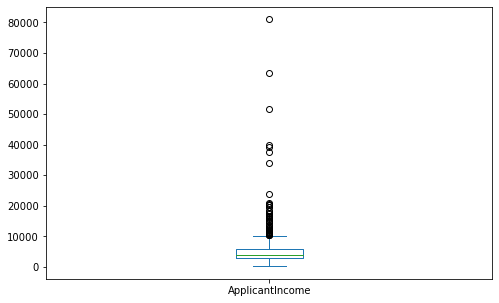

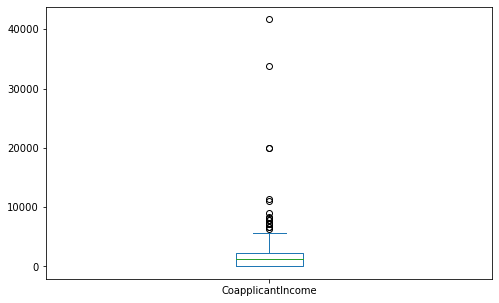

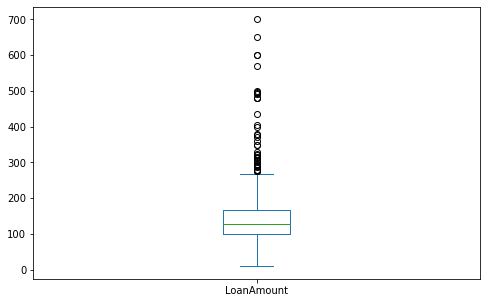

In [18]:
plt.figure(figsize=(8, 5))
train_data['ApplicantIncome'].plot.box()

plt.figure(figsize=(8, 5))
train_data['CoapplicantIncome'].plot.box()

plt.figure(figsize=(8, 5))
train_data['LoanAmount'].plot.box()

# Bivariate Analysis


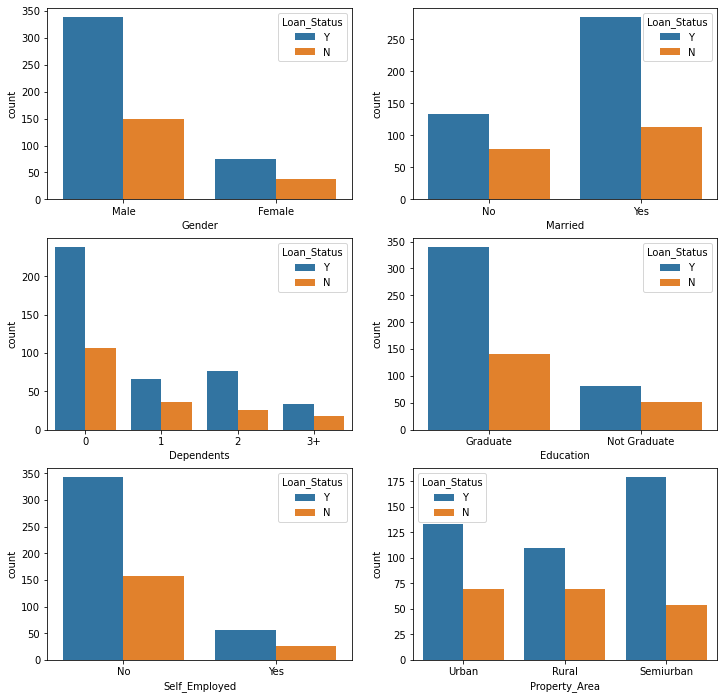

In [19]:
groups=['Gender', 'Married','Dependents','Education','Self_Employed', 'Property_Area']
fig,ax=plt.subplots(3,2,figsize=(12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
      sns.countplot(x=group,data=train_data,hue="Loan_Status",ax=axs[i],fill=True)

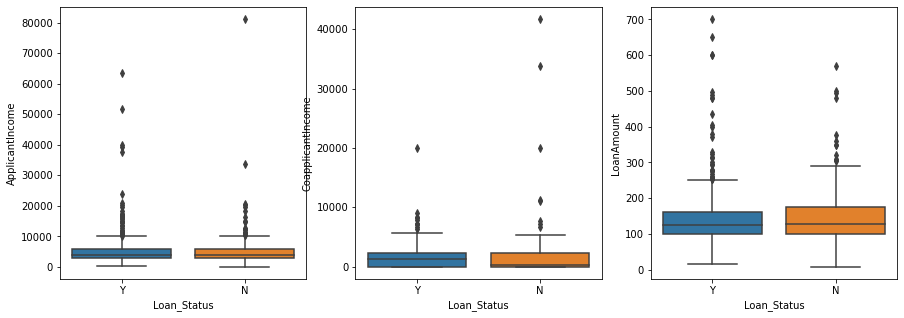

In [20]:
con_var=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
fig,ax=plt.subplots(1,3,figsize=(15,5))
axs=ax.ravel()
for i, var in enumerate(con_var):
      sns.boxplot(x="Loan_Status",data=train_data,y=var,ax=axs[i])


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

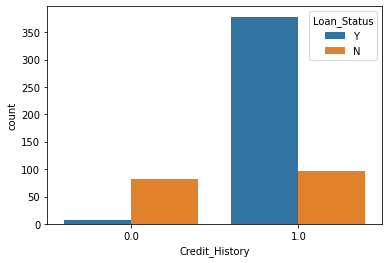

In [21]:
sns.countplot(train_data.Credit_History,hue=train_data.Loan_Status)

In [22]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [23]:
train_data.Dependents.replace({"3+":3 }, inplace=True)

In [24]:
train_data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [25]:
train_data.Credit_History.median()

1.0

In [26]:
train_data.Gender.fillna("Male" ,inplace= True)
train_data.Married.fillna("Yes" ,inplace= True)
train_data.Dependents.fillna(train_data.Dependents.mode()[0] ,inplace= True)
train_data.Self_Employed.fillna("No" ,inplace= True)
train_data.LoanAmount.fillna(train_data.LoanAmount.median() ,inplace= True)
train_data.Loan_Amount_Term.fillna(train_data.Loan_Amount_Term.median() ,inplace= True)
train_data.Credit_History.fillna(train_data.Credit_History.median() ,inplace= True)

In [27]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Series([], dtype: int64)

In [28]:
train_data.Dependents=train_data.Dependents.astype(float)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [30]:
train_data.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
train_data = train_data.drop(['Loan_ID'],axis=1)

In [32]:
train_data.Gender.replace({"Male":1 ,"Female":0}, inplace= True)
train_data.Married.replace({"Yes":1 ,"No":0}, inplace= True)
train_data.Education.replace({"Graduate":1 ,"Not Graduate":0}, inplace= True)
train_data.Self_Employed.replace({"Yes":1 ,"No":0}, inplace= True)
train_data.Property_Area.replace({"Semiurban":1,"Rural":0,"Urban":2}, inplace= True)
train_data.Loan_Status.replace({"Y":1 ,"N":0}, inplace= True)

In [33]:
train_data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score,recall_score ,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [35]:
x=train_data.drop("Loan_Status",axis=1)
y=train_data["Loan_Status"]
col=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
x[col]


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.000000,128.0,360.0
1,4583,1508.000000,128.0,360.0
2,3000,0.000000,66.0,360.0
3,2583,2358.000000,120.0,360.0
4,6000,0.000000,141.0,360.0
5,5417,4196.000000,267.0,360.0
6,2333,1516.000000,95.0,360.0
7,3036,2504.000000,158.0,360.0
8,4006,1526.000000,168.0,360.0
9,12841,10968.000000,349.0,360.0


# Feature scaling


In [36]:
from sklearn.preprocessing import MinMaxScaler


In [37]:
mmc =MinMaxScaler()
x[col]=mmc.fit_transform(x[col])
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1,0,0.070489,0.000000,0.172214,0.74359,1.0,2
1,1,1,1.0,1,0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,1,1,0.0,1,1,0.035250,0.000000,0.082489,0.74359,1.0,2
3,1,1,0.0,0,0,0.030093,0.056592,0.160637,0.74359,1.0,2
4,1,0,0.0,1,0,0.072356,0.000000,0.191027,0.74359,1.0,2


# Logistic regression model


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8712,test_size=0.2)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
lr.score(x_train,y_train)


0.8065173116089613

In [48]:
lr.score(x_test,y_test)


0.8211382113821138

In [49]:
p1=lr.predict(x_test)


              precision    recall  f1-score   support

           0       0.95      0.49      0.65        41
           1       0.79      0.99      0.88        82

    accuracy                           0.82       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.85      0.82      0.80       123



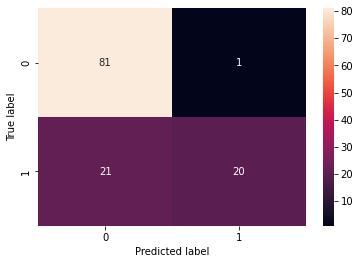

In [50]:
sns.heatmap(confusion_matrix(y_test,p1,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,p1))

In [51]:
precision_score(y_test,p1)

0.7941176470588235

In [52]:
recall_score(y_test ,p1)

0.9878048780487805

In [53]:
f1_score(y_test ,p1)

0.8804347826086957

# Support Vector Classifier Model


In [42]:
from sklearn.svm import SVC
sv=SVC(kernel="linear")

In [43]:
sv.fit(x_train,y_train)


SVC(kernel='linear')

In [44]:
sv.score(x_train,y_train)


0.8065173116089613

In [45]:
sv.score(x_test,y_test)


0.8211382113821138

In [58]:
p5=sv.predict(x_test)

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        41
           1       0.79      0.99      0.88        82

    accuracy                           0.82       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.85      0.82      0.80       123



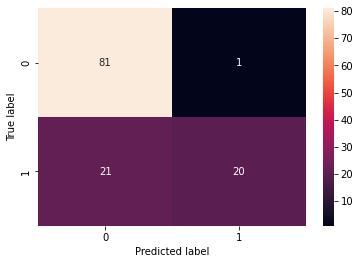

In [59]:
sns.heatmap(confusion_matrix(y_test,p5,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,p5))

In [60]:
precision_score(y_test,p5)

0.7941176470588235

In [61]:
recall_score(y_test ,p5)

0.9878048780487805

In [62]:
f1_score(y_test ,p5)

0.8804347826086957

# Decision Tree classifier


In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dc=DecisionTreeClassifier()


In [65]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
dc.score(x_train,y_train)

1.0

In [67]:
dc.score(x_test,y_test)


0.6829268292682927

In [68]:
p2=dc.predict(x_test)


              precision    recall  f1-score   support

           0       0.53      0.51      0.52        41
           1       0.76      0.77      0.76        82

    accuracy                           0.68       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.68      0.68      0.68       123



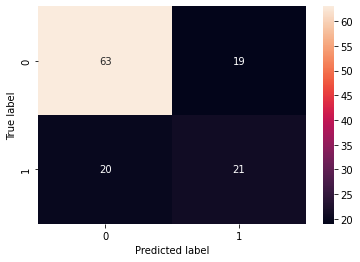

In [69]:
sns.heatmap(confusion_matrix(y_test,p2,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,p2))


In [70]:
precision_score(y_test,p2)

0.7590361445783133

In [71]:
recall_score(y_test ,p2)

0.7682926829268293

In [72]:
f1_score(y_test ,p2)

0.7636363636363638

# Hyperparameter tuning with RandomizedSearchCV


In [73]:
param1={"max_depth":(10,30,50,70,90,100),
 "criterion":("gini","entropy"),
 "max_depth":(3,5,7,9,10),
 "max_features":("auto","sqrt","log2"),
 "min_samples_split":(2,4,6)}

In [74]:
dt1=DecisionTreeClassifier()

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
dtr=RandomizedSearchCV(dt1,param_distributions=param1,cv=8,verbose=2,n_jobs=-1,n_iter=5)

In [77]:
dtr.fit(x,y)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


RandomizedSearchCV(cv=8, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=2)

In [78]:
dtr.best_params_


{'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini'}

In [79]:
dtr.best_estimator_


DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=6)

In [80]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=13, 
max_features='sqrt', min_samples_split=4)


In [81]:
dt2.fit(x,y)


DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features='sqrt',
                       min_samples_split=4)

In [82]:
dt2.score(x_train,y_train)


0.9063136456211812

In [83]:
dt2.score(x_test,y_test)


0.9024390243902439

In [84]:
dt2p=dt2.predict(x_test)


              precision    recall  f1-score   support

           0       1.00      0.71      0.83        41
           1       0.87      1.00      0.93        82

    accuracy                           0.90       123
   macro avg       0.94      0.85      0.88       123
weighted avg       0.91      0.90      0.90       123

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        41
           1       0.87      1.00      0.93        82

    accuracy                           0.90       123
   macro avg       0.94      0.85      0.88       123
weighted avg       0.91      0.90      0.90       123



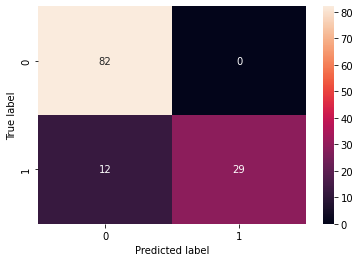

In [85]:
sns.heatmap(confusion_matrix(y_test,dt2p,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,dt2p))
print(classification_report(y_test,dt2p))

In [86]:
precision_score(y_test,dt2p)

0.8723404255319149

In [87]:
recall_score(y_test ,dt2p)

1.0

In [88]:
f1_score(y_test ,dt2p)

0.9318181818181819

#  Random Forest Classifier


In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [90]:
rf.fit(x_train,y_train)


RandomForestClassifier()

In [91]:
rf.score(x_train,y_train)

1.0

In [92]:
rf.score(x_test,y_test)

0.8292682926829268

In [93]:
p8=rf.predict(x_test)


              precision    recall  f1-score   support

           0       0.92      0.54      0.68        41
           1       0.81      0.98      0.88        82

    accuracy                           0.83       123
   macro avg       0.86      0.76      0.78       123
weighted avg       0.84      0.83      0.81       123



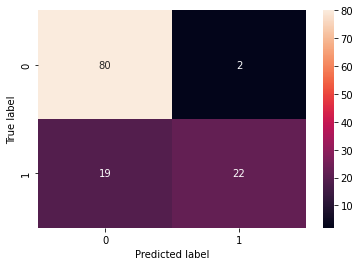

In [94]:
sns.heatmap(confusion_matrix(y_test,p8,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,p8))

In [95]:
precision_score(y_test,p8)

0.8080808080808081

In [96]:
recall_score(y_test ,p8)

0.975609756097561

In [97]:
f1_score(y_test ,p8)

0.8839779005524863

# Hyperparameter tuning with RandomizedSearchCV


In [98]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
# number of trees in random forest

In [99]:
max_features=["auto","sqrt"]
# number of features to consider at every split

In [100]:
max_depth=[2,4]
# maximun no of level in tree

In [101]:
min_samples_split=[2,5]
#minimun no of samples required to split

In [102]:
min_samples_leaf=[1,2]
# minimun no of samples required at each leaf node

In [103]:
bootstrap=[True,False]
# method of selecting samples for training each tree

In [104]:
param2={"n_estimators":n_estimators,
 'max_features':max_features,
 "max_depth":max_depth,
 "min_samples_split":min_samples_split,
 "min_samples_leaf":min_samples_leaf,
 "bootstrap":bootstrap}

In [105]:
rfr=RandomizedSearchCV(rf,param_distributions=param2,cv=8,verbose=2,n_jobs=-1,n_iter=5)

In [106]:
rfr.fit(x,y)


Fitting 8 folds for each of 5 candidates, totalling 40 fits


RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [107]:
rfr.best_params_


{'n_estimators': 72,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [108]:
rfr1=RandomForestClassifier(n_estimators= 41,min_samples_split= 2,min_samples_leaf= 1,max_features= 'auto',max_depth= 4,bootstrap= False)

In [109]:
rfr1.fit(x,y)


RandomForestClassifier(bootstrap=False, max_depth=4, max_features='auto',
                       n_estimators=41)

In [110]:
rfr1.score(x_train,y_train)


0.8228105906313645

In [111]:
rfr1.score(x_test,y_test)


0.8292682926829268

In [112]:
rfrp=rfr1.predict(x_test)


              precision    recall  f1-score   support

           0       1.00      0.49      0.66        41
           1       0.80      1.00      0.89        82

    accuracy                           0.83       123
   macro avg       0.90      0.74      0.77       123
weighted avg       0.86      0.83      0.81       123



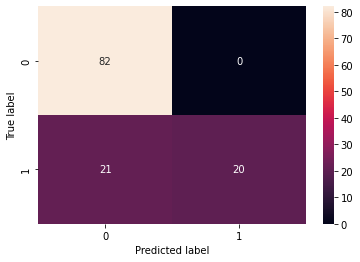

In [113]:
sns.heatmap(confusion_matrix(y_test,rfrp,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,rfrp))

In [114]:
precision_score(y_test ,rfrp)

0.7961165048543689

In [115]:
recall_score(y_test ,rfrp)

1.0

In [116]:
f1_score(y_test, rfrp)

0.8864864864864864

# XGboost classifier


In [117]:
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()

In [118]:
xgb.fit(x_train,y_train)

GradientBoostingClassifier()

In [119]:
xgb.score(x_train,y_train)

0.8920570264765784

In [120]:
xgb.score(x_test,y_test)

0.7967479674796748

In [121]:
xgp=xgb.predict(x_test)

              precision    recall  f1-score   support

           0       0.81      0.51      0.63        41
           1       0.79      0.94      0.86        82

    accuracy                           0.80       123
   macro avg       0.80      0.73      0.74       123
weighted avg       0.80      0.80      0.78       123



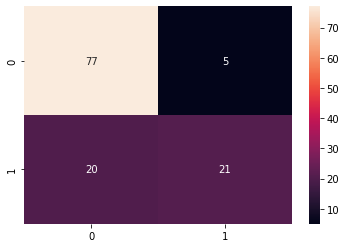

In [122]:
sns.heatmap(confusion_matrix(y_test,xgp,labels=(1,0)),annot=True)
print(classification_report(y_test,xgp))

In [123]:
precision_score(y_test ,xgp)

0.7938144329896907

In [124]:
recall_score(y_test ,xgp)

0.9390243902439024

In [125]:
f1_score(y_test ,xgp)

0.8603351955307262

# Hyperparameter tuning


In [126]:
xgbr=GradientBoostingClassifier(max_depth=5)

In [127]:
xgbr.fit(x,y)


GradientBoostingClassifier(max_depth=5)

In [128]:
xgbrp=xgbr.predict(x_test)


In [129]:
xgbr.score(x_train,y_train)


0.9775967413441955

In [130]:
xgbr.score(x_test,y_test)


0.991869918699187

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.99      1.00      0.99        82

    accuracy                           0.99       123
   macro avg       0.99      0.99      0.99       123
weighted avg       0.99      0.99      0.99       123



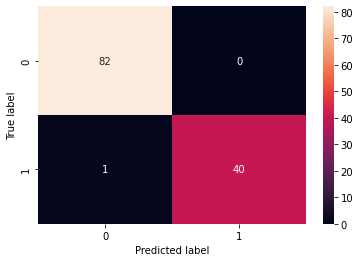

In [131]:
sns.heatmap(confusion_matrix(y_test,xgbrp,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,xgbrp))

In [132]:
precision_score(y_test ,xgbrp)

0.9879518072289156

In [133]:
recall_score(y_test ,xgbrp)

1.0

In [134]:
f1_score(y_test ,xgbrp)

0.993939393939394

# important feature

In [46]:
from xgboost import XGBClassifier


In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from xgboost import XGBClassifier
xgb=XGBClassifier()


In [49]:
xgb.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
xgb.score(x_train,y_train)


0.9979633401221996

In [51]:
xgb.score(x_test,y_test)


0.7804878048780488

In [52]:
xgp=xgb.predict(x_test)


              precision    recall  f1-score   support

           0       0.75      0.51      0.61        41
           1       0.79      0.91      0.85        82

    accuracy                           0.78       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.78      0.78      0.77       123



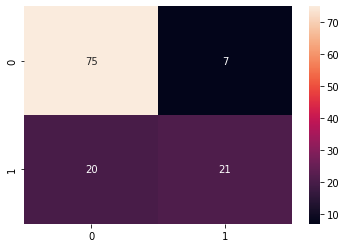

In [53]:
sns.heatmap(confusion_matrix(y_test,xgp,labels=(1,0)),annot=True)
print(classification_report(y_test,xgp))

In [54]:
parames={
"learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
"max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [ 1, 3, 5, 7 ],
"gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

In [55]:
xgb1=XGBClassifier()

In [56]:
r_search=RandomizedSearchCV(xgb1,param_distributions=parames,n_iter=5,n_jobs=-1,cv=8,verbose=2)


NameError: name 'RandomizedSearchCV' is not defined

In [ ]:
r_search.fit(x,y)

In [ ]:
r_search.best_params_


In [ ]:
r_search.best_estimator_


In [ ]:
xgbr=XGBClassifier(min_child_weight= 1,max_depth= 12,learning_rate= 0.05,gamma= 0.3,colsample_bytree= 0.7)


In [ ]:
xgbr.fit(x,y)


In [ ]:
xgbrp=xgbr.predict(x_test)

In [ ]:
xgbr.score(x_train,y_train)


In [ ]:
xgbr.score(x_test,y_test)


In [ ]:
sns.heatmap(confusion_matrix(y_test,xgbrp,labels=(1,0)),annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(classification_report(y_test,xgbrp))
from xgboost import plot_importance
plot_importance(xgbr)


In [156]:
import os
os.chdir("C:\Loan prediction")

In [158]:
import pickle
pickle.dump(train_data, open('model.pkl','wb'))  # Exporting model from python to laptop